In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
segmentation = pd.read_csv('segmentation.csv')
segmentation

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


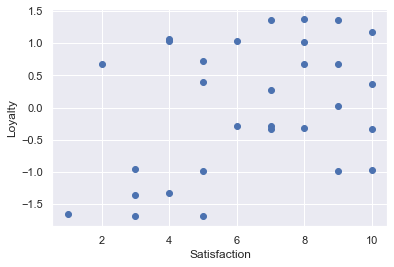

In [6]:
plt.scatter(segmentation['Satisfaction'], segmentation['Loyalty'])
plt.ylabel('Loyalty', )
plt.xlabel('Satisfaction')
plt.show()

In [7]:
x = segmentation.copy()

In [10]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [11]:
segmentation['Cluster'] = kmeans.fit_predict(x)
segmentation

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

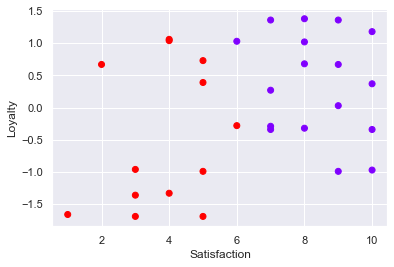

In [14]:
plt.scatter(segmentation['Satisfaction'], segmentation['Loyalty'], c = segmentation['Cluster'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [19]:
x_standard = preprocessing.scale(x)
x_standard

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [20]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x_standard)
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.315662464700004,
 3.7282834443589534,
 3.2824218094452555]

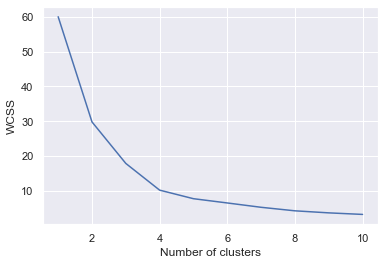

In [22]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
new_kmeans = KMeans(4)
new_kmeans.fit(x_standard)
segmentation['Cluster'] = new_kmeans.fit_predict(x_standard)
segmentation

,Satisfaction,Loyalty,Cluster
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

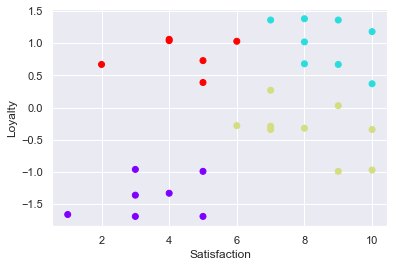

In [28]:
plt.scatter(segmentation['Satisfaction'], segmentation['Loyalty'], c = segmentation['Cluster'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')